In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
data = pd.read_csv("Udemy Courses dataset.csv")

In [3]:
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


# 1. Total number of courses

In [4]:
total_courses = len(data)
total_courses

3682

# 2. Count of paid and free courses

In [5]:
paid = len(data[data['is_paid'] == True])
free = len(data[data['is_paid'] == False])
print('Paid Courses:', paid)
print('Free Courses:', free)

Paid Courses: 3372
Free Courses: 310


# 3. Average price of paid courses

In [6]:
avg_paid = data[data['is_paid'] == True]['price']
avg_paid.mean()


inf

# 4. Course with highest number of subscibers

In [7]:
high_sub = data[data['num_subscribers'] == data['num_subscribers'].max()]
high_sub
# print("Course with highest Subscribers:",high_sub['course_title'])

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development


# 5. Average number of reviews for all courses

In [8]:
avg_reviews = data['num_reviews'].mean().round(2)
print("Average Number of Subscribers:",avg_reviews)

Average Number of Subscribers: 156.09


# 6. How many lectures, on average, do the courses have?

In [9]:
avg_lect = data['num_lectures'].mean().round(2)
avg_lect

40.07

# 7. What is the distribution of courses based on the difficulty level (level column)?

In [10]:
level_distribution = data["level"].value_counts()
level_distribution

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

Text(0.5, 1.0, 'Distribution of courses based on the difficulty level')

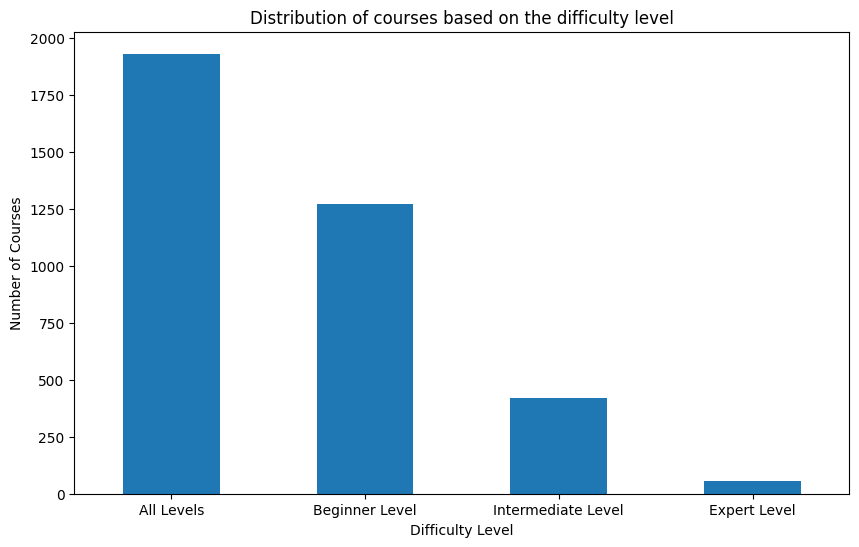

In [11]:
plt.figure(figsize=(10, 6))
level_distribution.plot.bar(x="Difficulty Level", y="Number of courses", rot=0)
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Courses")
plt.title("Distribution of courses based on the difficulty level")

# 8. Which subject has the most courses in the dataset?

In [12]:
sub_count = data['subject'].value_counts()
print(sub_count)
sub = data['subject'].max()
print("The subject with most courses is: ", sub)

Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64
The subject with most courses is:  Web Development


# 9. What is the earliest and latest published timestamps of the courses?

In [13]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])  # to covert the column to a datetime data type 
earliest = data['published_timestamp'].min()
latest = data['published_timestamp'].max()
print("Earliest published timestamp:", earliest)
print("Latest published timestamp:", latest)

Earliest published timestamp: 2011-07-09 05:43:31+00:00
Latest published timestamp: 2017-07-06 21:46:30+00:00


# 10. Which course has the longest duration?

In [14]:
longest_duration = data[data["content_duration"] == data["content_duration"].max()]
print("Courses with longest duration:\n",longest_duration['course_title'])
print("Duration: ", data["content_duration"].max())

Courses with longest duration:
 75      สร้างงานกราฟฟิคแอพพลิเคชั่นมือถือด้วย Adobe Il...
154                                  Adobe Illustrator CC
187     Adobe Suite : Unleash your creativity & benefi...
279          Angular 2 Master Class with Alejandro Rangel
281     Angular 2 with TypeScript for Beginners: The P...
619     Build Enterprise Applications with Angular 2 (...
818     Complete Trading Plan Course for Stocks & Fore...
1749    HTML5 And CSS3 - Build Modern Responsive Websites
2209    Learn How To Successfully Trade Stocks: In 5 S...
2248    Learn Laravel PHP Framework Building Multi Use...
2300    Learn React : The World's Most Lucrative JavaS...
2442                                    Learning Drupal 8
2445    Learning JavaScript Programming Tutorial. A De...
2839    Play Guitar and Understand Music Quick & Easy ...
3300                   The Complete Motion Graphic Course
3362                  The Professional Guitar Masterclass
Name: course_title, dtype: object
Durati

# 11. Is there any correlation between the number of subscribers and the number of reviews?

In [15]:
# data[:10]
print(data.corr(method = 'pearson'))
corr = data['num_subscribers'].corr(data['num_reviews'])
print('Correlation b/w number of subscribers and the number of reviews: ', corr.round(2))

                 course_id   is_paid  num_subscribers  num_reviews  \
course_id         1.000000 -0.013091        -0.168107    -0.058760   
is_paid          -0.013091  1.000000        -0.266227    -0.087519   
num_subscribers  -0.168107 -0.266227         1.000000     0.649957   
num_reviews      -0.058760 -0.087519         0.649957     1.000000   
num_lectures     -0.026080  0.112267         0.157929     0.243083   

                 num_lectures  
course_id           -0.026080  
is_paid              0.112267  
num_subscribers      0.157929  
num_reviews          0.243083  
num_lectures         1.000000  
Correlation b/w number of subscribers and the number of reviews:  0.65


C:\Users\91942\AppData\Local\Temp\ipykernel_6868\2877462811.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr(method = 'pearson'))


# 12. What are the top 5 courses with the highest subscriber-to-review ratio (subscribers/reviews)?

In [16]:
data['ratio'] = data['num_subscribers']/data['num_reviews']
with pd.option_context('mode.use_inf_as_null', True):             # For moving Inf and NAN values at last
    data = data.sort_values(by=['ratio'] , ascending=False, na_position='last')
print("Top 5 Course details with highest subscriber-to-review ratio:")
data.head()

Top 5 Course details with highest subscriber-to-review ratio:


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,ratio
3105,399170,Small Business Owners: Drive a Productive Busi...,True,20,5099,2,15,Beginner Level,3,2015-01-20 21:39:42+00:00,Business Finance,2549.5
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1,2017-04-12 19:06:34+00:00,Musical Instruments,1593.0
2454,537884,Leasing - A Comprehensive Study (Professional ...,True,20,3094,2,22,All Levels,3.5,2015-07-17 22:10:39+00:00,Business Finance,1547.0
861,479688,Cost Accounting Labour Costing (Professional C...,True,20,1542,1,24,All Levels,2,2015-04-20 18:33:40+00:00,Business Finance,1542.0
2877,959144,Practical Accounts APP Overview,True,20,1361,1,14,Intermediate Level,3,2016-10-04 23:38:32+00:00,Business Finance,1361.0


# 13. How many courses have more than 100,000 subscribers?

In [17]:
high = data[data['num_subscribers'] >= 100000]
print("Number of courses having more than 100,000 subscribers: ", high.shape[0])
high


Number of courses having more than 100,000 subscribers:  6


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,ratio
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,577.164875
1388,19421,Free Beginner Electric Guitar Lessons,False,Free,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments,97.076775
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,31.165025
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3,2014-04-08 16:21:30+00:00,Web Development,20.305706
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,5.109406
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43,2015-11-02 21:13:27+00:00,Web Development,4.430097


# 14. What is the average number of lectures for courses in each subject?

In [18]:
avg_num_lect = data.groupby('subject')['num_lectures'].mean()
print(avg_num_lect.round(0))


subject
Business Finance       32.0
Graphic Design         32.0
Musical Instruments    38.0
Web Development        53.0
Name: num_lectures, dtype: float64


# 15. How many courses were published in each year based on the published_timestamp column?

In [19]:
data["published_timestamp"] = pd.to_datetime(data["published_timestamp"])    # # to covert the column to a datetime data type 
courses_published_per_year = data["published_timestamp"].dt.year.value_counts().sort_index()
courses_published_per_year

2011       5
2012      45
2013     202
2014     491
2015    1014
2016    1206
2017     719
Name: published_timestamp, dtype: int64

Text(0.5, 1.0, 'Number of Courses Published per Year')

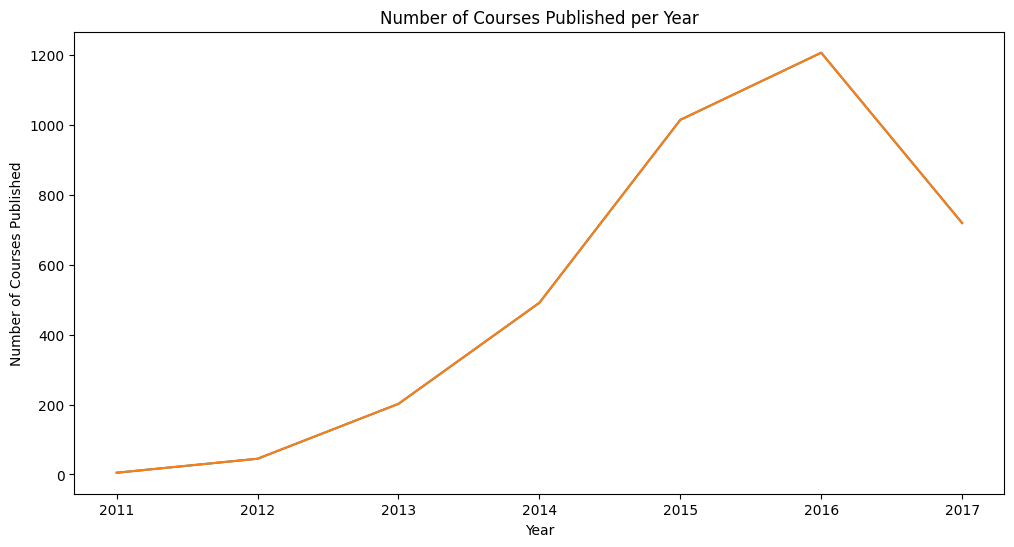

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=courses_published_per_year.index, y=courses_published_per_year.values)
courses_published_per_year.plot.line()
plt.xlabel("Year")
plt.ylabel("Number of Courses Published")
plt.title("Number of Courses Published per Year")
